In [2]:
import json
import matplotlib.pyplot as plt
%matplotlib inline
from typing import Optional
import numpy as np
import os
from strawberryfields.backends.tfbackend.states import FockStateTF
from math import exp
from src.utils import von_neumann_entropy, renyi_entropy

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import atan2, degrees
import copy
from cycler import cycler
import os

golden_mean = (np.sqrt(5.0)-1.0)/2.0

subplotlabelfont = {#'family': 'Helvetica',
        'fontweight': 'bold',
        'fontsize': 9
        }

def format_axes(axes, position=(-.1, 1.02)):
    for i, ax in enumerate(axes, start=97):
        ax.text(*position, chr(i), fontdict=subplotlabelfont, weight='bold',
                transform=ax.transAxes)

def figsize(scale, aspect_ratio = golden_mean):
    fig_width_pt = 246.0                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch

    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*aspect_ratio              # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

rcparams = {                      # setup matplotlib to use latex for output
    #"text.usetex": False,                # use LaTeX to write all text
    #"font.family": "sans-serif",
    #"font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    #"font.sans-serif": ["Helvetica"],
    #"font.monospace": [],
    "axes.labelsize": 12,               # LaTeX default is 10pt font.
    "axes.linewidth": 2,
    'lines.linewidth': 2,
    "xtick.major.width": 2,
    "ytick.major.width": 2,
    "lines.markersize":2,
    "font.size": 9,
    "legend.fontsize": 10,               # Make the legend/label fonts a little smaller
    "axes.spines.top": True,
    "axes.spines.right": True,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": figsize(1.5),  
    "xtick.direction": "inout",
    "ytick.direction": "inout"# default fig size of 0.9 textwidth
#    "mathtext.fontset" : "custom",
#     "mathtext.rm" :  "Helvetica",
#     "mathtext.it" :  "Helvetica:italic",
#     "mathtext.bf" :  "Helvetica:bold",
#     "mathtext.sf" :  "Helvetica",
#     "mathtext.tt" :  "DejaVu Sans",
#     "mathtext.cal" : "DejaVu Sans:italic",
    }

mpl.rcParams.update(rcparams)

#Grad = ['#03fc28','#b503fc','#ff0000','#f5b942','#00ffaf','#FFAEBC','#B4F8C8','#C70039','#FFA500','#ffe800','#ff0078', '#00ffba','#1f52fe','#ff9600']
            
#mpl.rcParams['axes.prop_cycle'] =cycler(color=Grad)
dt=1e-3
steps=int(2e5)
x=np.array(list(range(0,steps)))*dt
a=1
a2=.4


### tick parameters
tick_dir = 'in' # out, inout
tick_len = 5
tick_width = 1


plt.style.use(['seaborn-whitegrid'])#(['Solarize_Light2'])

In [4]:
dir = 'logs/2023.02.21.13.19.23'
plots_path = os.path.join('./latex', 'figures')
os.makedirs(plots_path, exist_ok=True)
res = np.load(os.path.join(dir, 'results.npy'))
starting_distance = 0

binding_energies = res[:, starting_distance:, -1, -1]
states = res[:, starting_distance:, :-1, :-1]
distances = np.load(os.path.join(dir, 'distance_array.npy'))[starting_distance:]
thetas = np.load(os.path.join(dir, 'angle_array.npy'))
quadrature_grid = np.load(os.path.join(dir, 'quadrature_array.npy'))
entropy_array = von_neumann_entropy(states=states)
renyi_entropy_array = renyi_entropy(states=states, n=2)
correlation_array = np.load(os.path.join(dir, 'correlation_array.npy'))
startingDistance = [1, 2, 3, 5, 7, 8, 10, 12, 15, 18, 24, 22, 18, 17, 17, 16, 21, 25, 24] # starting at the first non-parallel angle

with open(os.path.join(dir, 'args.json')) as f:
    args = json.load(f)

In [25]:
print(len(quadrature_grid))

500


In [5]:
def entropy_fit(r):
    expr = (1354.1190287327627 + 69.57059464705372/r**6 - 589.0017867913149/r**5 + 2177.9948912201044/r**4 - 4485.60849646864/r**3 + 5528.745912907768/r**2 - 3988.1254971335707/r + 203.0086635377917*r - 420.62415056426846*r**2 + 192.6852057844995*r**3 - 45.45103486645947*r**4 + 5.6428967627556075*r**5 - 0.292282473955571*r**6)/(-1 + exp(3.340009074510866/r))
    
    return expr

def fit_morse_quality(r):
    return 0.7562780555949897/exp(7.90810731120047*r)


def correlation_fit(r):
    def k(x, y, sigma):
        return exp(-(x - y)**2 / (2 * sigma**2))
    
    sigma = 0.04
    up = 0
    down = 0

    start = startingDistance[7]

    for i in range(distances[start:].shape[0]):
        up += k(r, distances[start:][i], sigma) * correlation_array[7][start:][i]
        down += k(r, distances[start:][i], sigma)
 
    return up / down

def interpolation_morse(r, angle_idx):
    r'''
    These are the Morse potential fit obtained in Mathematica
    '''
    
    if angle_idx == 1:
        expr = 5.580390309448237*(exp(-3.0377471897088193*(-0.528669782788294 + r)) - 2/exp(1.5188735948544096*(-0.528669782788294 + r)))
    elif angle_idx == 2:
        expr = 3.4274486627573997*(exp(-3.799380158605931*(-0.47973290114432926 + r)) - 2/exp(1.8996900793029654*(-0.47973290114432926 + r)))
    elif angle_idx == 3:
        expr = 2.285401169096024*(exp(-4.402463155249511*(-0.4631079255337017 + r)) - 2/exp(2.2012315776247555*(-0.4631079255337017 + r)))
    elif angle_idx == 4:
        expr = 1.551192171427588*(exp(-4.81570374860555*(-0.4642655447957261 + r)) - 2/exp(2.407851874302775*(-0.4642655447957261 + r)))
    elif angle_idx == 5:
        expr = 1.0598470742964785*(exp(-5.1410754088615755*(-0.4783898190284267 + r)) - 2/exp(2.5705377044307878*(-0.4783898190284267 + r)))
    elif angle_idx == 6:
        expr = 0.7148220809706628*(exp(-5.3904241278507286*(-0.5018955265663114 + r)) - 2/exp(2.6952120639253643*(-0.5018955265663114 + r)))
    elif angle_idx == 7:
        expr = 0.46331721539795195*(exp(-5.5069105743552305*(-0.5384565406606292 + r)) - 2/exp(2.7534552871776152*(-0.5384565406606292 + r)))
    elif angle_idx == 8:
        expr = 0.28495211368558043*(exp(-5.501660360933069*(-0.5868720195028256 + r)) - 2/exp(2.7508301804665347*(-0.5868720195028256 + r)))
    elif angle_idx == 9:
        expr = 0.16054553861792828*(exp(-5.406762370032314*(-0.6589019567964931 + r)) - 2/exp(2.703381185016157*(-0.6589019567964931 + r)))
    elif angle_idx == 10:
        expr = 0.0802423625900907*(exp(-5.2807411035440905*(-0.7610680973692473 + r)) - 2/exp(2.6403705517720453*(-0.7610680973692473 + r)))
    elif angle_idx == 11:
        expr = 0.031941895762222915*(exp(-4.8881023079372845*(-0.9318352120398004 + r)) - 2/exp(2.4440511539686423*(-0.9318352120398004 + r)))
    elif angle_idx == 12:
        expr = -0.21795992863678978*(exp(-18.93357243882598*(-0.419031099683263 + r)) - 2/exp(9.46678621941299*(-0.419031099683263 + r)))
    elif angle_idx == 13:
        expr = -4.596185038513766e8*(exp(-11.486738219445648*(3.3611808687392295 + r)) - 2/exp(5.743369109722824*(3.3611808687392295 + r)))
    elif angle_idx == 14:
        expr = -8.435877205314344e8*(exp(-9.835982910255005*(4.090374604186538 + r)) - 2/exp(4.917991455127503*(4.090374604186538 + r)))
    elif angle_idx == 15:
        expr = -5595.4996148289965*(-2*exp(3.473725867625206e-6*(199537.59265461436 + r)) + exp(6.947451735250412e-6*(199537.59265461436 + r)))
    elif angle_idx == 16:
        expr = -6257.5024012085705*(-2*exp(3.613860552846493e-6*(191800.01322388317 + r)) + exp(7.227721105692986e-6*(191800.01322388317 + r)))
    elif angle_idx == 17:
        expr = -78.2709544530638*(exp(-7.326961784623224*(1.1821855753944306 + r)) - 2/exp(3.663480892311612*(1.1821855753944306 + r)))
    elif angle_idx == 18:
        expr = -60.335480736907535*(exp(-6.655169258297058*(1.283760988719811 + r)) - 2/exp(3.327584629148529*(1.283760988719811 + r)))
    elif angle_idx == 19:
        expr = -59.1291656257202*(exp(-6.735608158749974*(1.248561482832166 + r)) - 2/exp(3.367804079374987*(1.248561482832166 + r)))
    return expr

def repulsion_vs_correlation(r):
    '''this is for angle_idx=7'''
    correlation = -0.46331721539795195*(2/exp(2.7534552871776152*(-0.5384565406606292 + r)))
    repulsion = 0.46331721539795195*(exp(-5.5069105743552305*(-0.5384565406606292 + r)))
    return correlation, repulsion

def repulsion_vs_correlation_2nd_derivative(r):
    '''this is for angle_idx=7'''
    correlation = -7.025293780360139/exp(2.7534552871776152*(-0.5384565406606292 + r))
    repulsion = 14.050587560720277/exp(5.5069105743552305*(-0.5384565406606292 + r))
    return correlation, repulsion

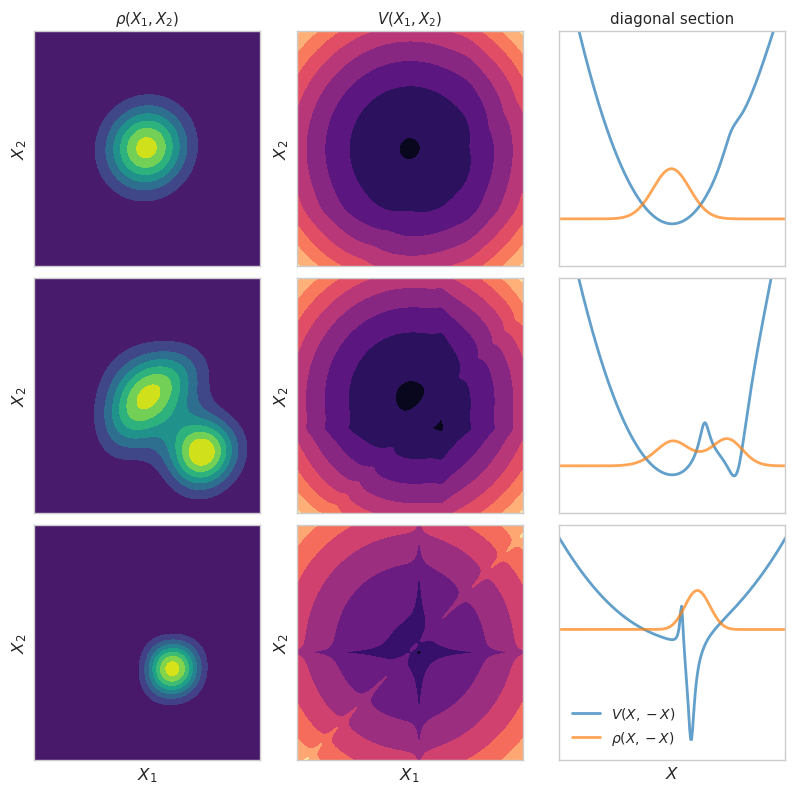

In [62]:
def potential(x, y, d, theta):
    
    ee_int = ((x-y)**2 + d**2 - 2*(y-x)*d*np.cos(theta))**(-0.5)
        
    return ( + x**2 + y**2 - (x**2 + d**2 - 2*x*d*np.cos(np.pi - theta))**(-0.5) + ee_int - (y**2 + d**2 - 2*y*d*np.cos(theta))**(-0.5) )


from src.utils import quadratures_density
import copy
cmappa = 'viridis'
#cmappa = 'GnBu'
def plot_wigner(
    fig_dir: Optional[str],
    quadrature_grid: np.ndarray,
    states: np.ndarray,
    cutoff_dim: int = 5
) -> None:

    X, P = np.meshgrid(quadrature_grid, quadrature_grid)
    X1, X2 = np.meshgrid(quadrature_grid, quadrature_grid)

    state0 = FockStateTF(state_data=states[2, 180], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    state1 = FockStateTF(state_data=states[2, 100], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    state2 = FockStateTF(state_data=states[2, 24], num_modes=2, pure=True, cutoff_dim=cutoff_dim)
    w_qdo1_0 = state0.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_0 = state0.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo1_1 = state1.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_1 = state1.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo1_2 = state2.wigner(mode=0, xvec=quadrature_grid, pvec=quadrature_grid)
    w_qdo2_2 = state2.wigner(mode=1, xvec=quadrature_grid, pvec=quadrature_grid)
    
    # large distance
    joint_density0 = quadratures_density(
        x=quadrature_grid,
        alpha=states[2, 180],
        num_modes=2,
        cutoff=cutoff_dim
    )

    # intermediate distance
    joint_density1 = quadratures_density(
        x=quadrature_grid,
        alpha=states[2, 100],
        num_modes=2,
        cutoff=cutoff_dim
    )

    # max entropy
    joint_density2 = quadratures_density(
        x=quadrature_grid,
        alpha=states[2, 24],
        num_modes=2,
        cutoff=cutoff_dim
    )

    # large distance
    section_joint_density0 = np.diagonal(joint_density0)

    # intermediate distance
    section_joint_density1 = quadratures_density(
        x=quadrature_grid,
        alpha=states[2, 100],
        num_modes=2,
        cutoff=cutoff_dim
    )

    # max entropy
    section_joint_density2 = quadratures_density(
        x=quadrature_grid,
        alpha=states[2, 24],
        num_modes=2,
        cutoff=cutoff_dim
    )

    potentiald_1 = []
    d = 3.18
    theta = 0.1653
    for x in quadrature_grid:
        pot = []
        for y in quadrature_grid:
            pot.append(potential(x,y,d,theta))
        potentiald_1.append(pot)

    potentiald_2 = []
    d = 1.75
    theta = 0.1653
    for x in quadrature_grid:
        pot = []
        for y in quadrature_grid:
            pot.append(potential(x,y,d,theta))
        potentiald_2.append(pot)

    potentiald_3 = []
    d = 0.51
    theta = 0.1653
    for x in quadrature_grid:
        pot = []
        for y in quadrature_grid:
            pot.append(potential(x,y,d,theta))
        potentiald_3.append(pot)

    section_potentiald_1 = []
    d = 3.18
    theta = 0.1653
    for x in quadrature_grid:
        section_potentiald_1.append(potential(-x,x,d,theta))

    section_potentiald_2 = []
    d = 1.75
    theta = 0.1653
    for x in quadrature_grid:
        section_potentiald_2.append(potential(-x,x,d,theta))

    section_potentiald_3 = []
    d = 0.51
    theta = 0.1653
    for x in quadrature_grid:
        section_potentiald_3.append(potential(-x,x,d,theta))

    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8), sharex=False, sharey=False, gridspec_kw={'width_ratios': [1, 1, 1]})

    axes[0, 2].plot(
        quadrature_grid, 
        section_potentiald_1, 
        #c='darkorange',
        alpha=0.7,
    )
    
    axes[0, 2].plot(
        quadrature_grid, 
        [10*joint_density0.numpy()[len(quadrature_grid)-i-1, i] for i in range(0,len(quadrature_grid))], 
        #c='darkorange',
        alpha=0.7,
        label = r'$\rho(X, -X)$'
    )
    
    
    heatmap1_0 = axes[0, 1].contourf(quadrature_grid, quadrature_grid, potentiald_1, cmap = 'magma')
    axes[0, 1].set_title(r"$V(X_1,X_2)$")
    # cbar = plt.colorbar(heatmap1_0, ax=axes[0,2])
    # cbar.ax.tick_params(labelsize=9)
    # cbar.locator = plt.MaxNLocator(4)
    # cbar.update_ticks()
    heatmap3_0 = axes[0, 0].contourf(X1, X2, joint_density0, cmap = cmappa)
    # cbar = plt.colorbar(heatmap3_0, ax=axes[0,2])
    # cbar.ax.tick_params(labelsize=9)
    # cbar.locator = plt.MaxNLocator(4)
    # cbar.update_ticks()
    axes[0, 0].set_title(r"$\rho(X_1, X_2)$")

    plt2 = axes[1, 2].plot(
        quadrature_grid, 
        section_potentiald_2, 
        #c='darkorange',
        alpha=0.7
    )
    axes[1, 2].plot(
        quadrature_grid, 
        [10*joint_density1.numpy()[len(quadrature_grid)-i-1, i] for i in range(0,len(quadrature_grid))], 
        #c='darkorange',
        alpha=0.7,
        label = r'$\rho(X, -X)$'
    )
    heatmap1_1 = axes[1, 1].contourf(quadrature_grid, quadrature_grid, potentiald_2, cmap = 'magma')
    #axes[1,0].set_ylabel('Y')
    # cbar = plt.colorbar(heatmap1_1, ax=axes[1,1])
    # cbar.ax.tick_params(labelsize=9)
    # cbar.locator = plt.MaxNLocator(4)
    # cbar.update_ticks()
    heatmap3_1 = axes[1, 0].contourf(X1, X2, joint_density1, cmap = cmappa)
    # cbar = plt.colorbar(heatmap3_1, ax=axes[1,2])
    # cbar.ax.tick_params(labelsize=9)
    # cbar.locator = plt.MaxNLocator(4)
    # cbar.update_ticks()
    #axes[1, 0].set_ylabel(r"$d = 1.81$")

    plt3 = axes[2, 2].plot(
        quadrature_grid, 
        section_potentiald_3, 
        #c='darkorange',
        alpha=0.7,
        label = r"$V(X,-X)$"
    )
    axes[2, 2].plot(
        quadrature_grid, 
        [10*joint_density2.numpy()[len(quadrature_grid)-i-1, i] for i in range(0,len(quadrature_grid))], 
        #c='darkorange',
        alpha=0.7,
        label = r'$\rho(X, -X)$'
    )
    heatmap1_2 = axes[2, 1].contourf(quadrature_grid, quadrature_grid, potentiald_3, cmap = 'magma')
    # cbar = plt.colorbar(heatmap1_2, ax=axes[2,1])
    # cbar.ax.tick_params(labelsize=9)
    # cbar.locator = plt.MaxNLocator(4)
    # cbar.update_ticks()
    heatmap3_2 = axes[2, 0].contourf(X1, X2, joint_density2, cmap = cmappa)
    # cbar = plt.colorbar(heatmap3_2, ax=axes[2,2])
    # cbar.ax.tick_params(labelsize=9)
    # cbar.locator = plt.MaxNLocator(4)
    # cbar.update_ticks()

    for i in range(0,3):
        axes[i, 0].set_xlim(-3,3)
        axes[i, 0].set_ylim(-3,3)
        axes[i,0].yaxis.set_major_locator(plt.MaxNLocator(3))
        axes[i,1].yaxis.set_major_locator(plt.MaxNLocator(3))
        axes[i,1].set_ylabel(r'$X_2$')
        axes[i,0].set_ylabel(r'$X_2$')
        #axes[i,0].set_ylabel(r'$V(X_1, -X_1)$')
        for j in range(0,3):
            axes[i, j].set_xticks([])
            axes[i, j].set_yticks([])
    for i in range(0,2):
        axes[i, 2].set_xlim(-3,3)
        axes[i, 2].set_ylim(-3,12)
    axes[2, 2].set_xlim(-3,3)
    axes[2, 2].set_ylim(-25,20)
    axes[2,2].set_xlabel(r'$X$')
    axes[2,1].set_xlabel(r'$X_1$')
    axes[2,0].set_xlabel(r'$X_1$')
    axes[0, 2].set_title("diagonal section")
    plt.legend()
    fig.tight_layout(pad=1.0)
    plt.savefig(os.path.join(plots_path, 'classical_potential_small_angle.pdf'), dpi=300, transparent=False, bbox_inches='tight')


plot_wigner(
    fig_dir=None,
    quadrature_grid=quadrature_grid,
    states=states,
    cutoff_dim=args['cutoff_dim']
)

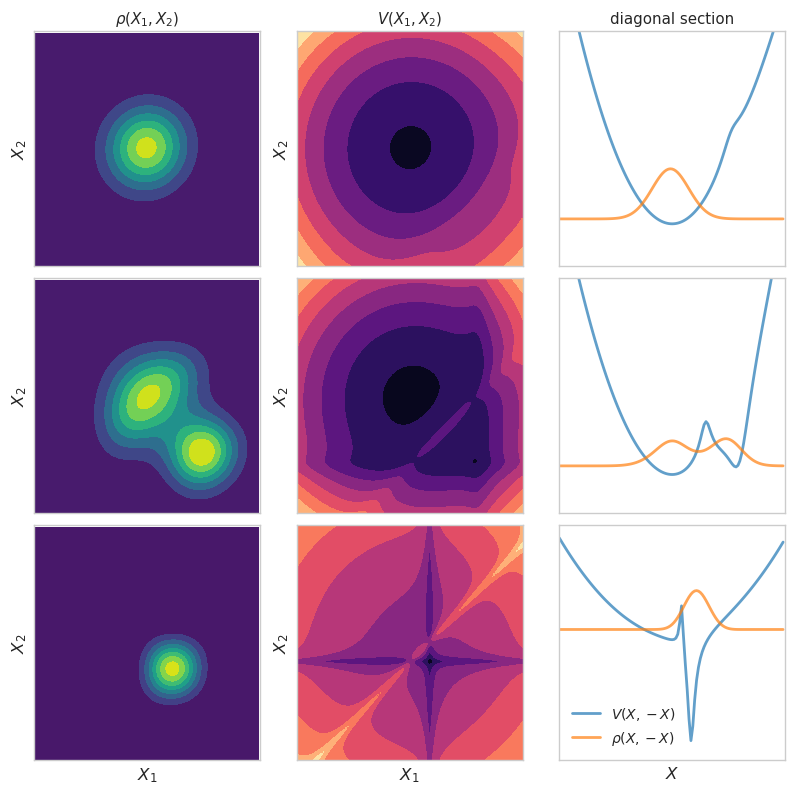

In [56]:
plot_wigner(
    fig_dir=None,
    quadrature_grid=np.arange(-3,3, 0.05),
    states=states,
    cutoff_dim=args['cutoff_dim']
)

In [57]:
np.max(quadrature_grid), np.min(quadrature_grid)

(6.0, -6.0)